#### Université Paul Sabatier, M2 MAPI3
# Machine learning - TP2

En tête pour charger les fonctions nécessaires au TP. La fonction <code>generateData</code> vous permet de générer autant d'échantillon que vous voulez du processus suivant:
- $X$ est uniforme sur $[-1,1]$
- $Y = \sin(5X) + \epsilon$ où $\epsilon$ est une gaussienne de moyenne $0$ et de variance $1/10$.

On commence avec un échantillon d'entrainement fixé que l'on dessine.

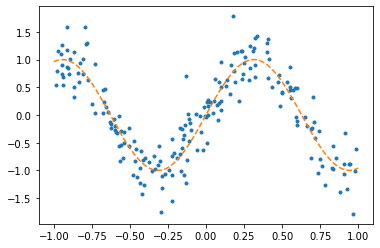

In [1]:
%matplotlib inline
from matplotlib import pyplot
import math
import numpy as np
import scipy.misc
import numpy.random as npr
import sklearn as sk
from sklearn import neighbors
from sklearn import tree
from sklearn import ensemble
from sklearn import model_selection

def generateData(n,seed=2):
    npr.seed(seed)
    x = npr.rand(n)*2 - 1
    y = np.sin(x*5) + npr.normal(size=n) / np.sqrt(10)
    return(np.array(x).reshape(-1,1),np.array(y).reshape(-1,1))

n = 200
(xn,yn) = generateData(n)
xSeq = np.array(np.linspace(-1,1,2000)).reshape(-1,1)
pyplot.plot(xn,yn,'.')
pyplot.plot(xSeq,np.sin(xSeq * 5),'--')

**Question 1:** A quoi sert l'argument `seed` de la fonction `generateData`? Que se passe t'il si cet argument n'est pas spécifié? Quel est le nom de la courbe orange? Que vaut l'erreur de Bayes? Reproduisez le dessin ci-dessous avec un échantillon issu du même processus, mais indépendant du premier, `(xn, yn)`. Donner la commande vous permettant de simuler un échantillon de test, indépendant de l'échantillon d'entrainement `(xn, yn)`, et de taille `nTest=3000`.

## Implémenter l'arbre de régression.

L'échantillon d'entrainement est fixé, de taille `n=200` par la commande `(xn,yn) = generateData(n)`. La commande suivante représente l'échantillon correspondant, ainsi que des arbres de régression [sk.tree.DecisionTreeRegressor](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html), de profondeur maximale $2, 5, 10,15$.

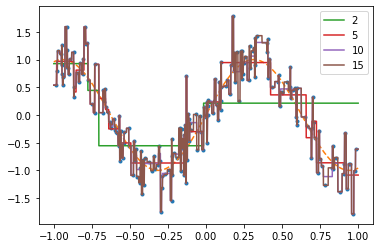

In [2]:
pyplot.plot(xn,yn,'.')
pyplot.plot(xSeq,np.sin(xSeq * 5),'--')
for k in (2,5,10,15):
    dtr = sk.tree.DecisionTreeRegressor(max_depth = k)
    dtr.fit(xn, yn)
    yPred = dtr.predict(xSeq)
    pyplot.plot(xSeq, yPred, label = k)

pyplot.legend()



**Question 2:** Commenter l'allure des graphiques ci-dessus. En quoi est ce que la profondeur maximale détermine la complexité du modèle? Que calcule la commande ci-dessous? A quoi sert le `reshape`? Que signifie cette valeur?

In [3]:
np.mean((yn - np.reshape(dtr.predict(xn), (n,1)))**2)

0.0

**Question 3:** représenter, en fonction de la profondeur maximale $p = 1, \ldots, 15$ l'erreur d'entrainement et une estimation de l'erreur de prédiction en fonction de $p$. Cette erreur de prédiction est évaluée sur un échantillon de test indépendant de taille `3000`. Commenter l'allure de cette courbe. Que vaut l'erreur de prédiction minimale et quelle est la valeur de $p$ correspondante? Nommer les régimes en dessous et au dessus de ces valeurs.


**Rappel:**, Pour estimer l'erreur d'entrainment il faut déterminer ce que le modèle prédit sur l'ensemble d'entrainement. Pour estimer l'erreur de prédiction, il faut déterminer ce que le modèle prédit sur un échantillon de test, qui doit indépendant de celui d'entrainement.

Min train error: 0.0
Min test error: 0.13894301453996374


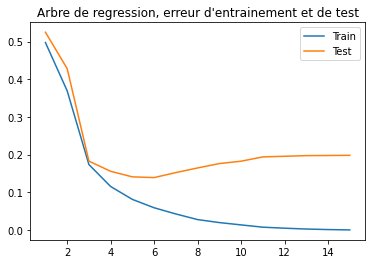

In [4]:
(xtest,ytest) = generateData(3000, 4)
maxP = 15
ps = np.arange(maxP) + 1
trainError = 1. * np.arange(maxP)
testError = 1. * np.arange(maxP)

for p in ps:
    #Modifier le code ici

pyplot.plot(ps, trainError, label = "Train")
pyplot.plot(ps, testError, label = "Test")
pyplot.title("Arbre de regression, erreur d'entrainement et de test")
pyplot.legend()    
print("Min train error: " + str( min(trainError)) )
print("Min test error: " + str(min(testError)))

## Bagging regression trees.

On reprend la **Question 3** en utilisant le [bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html). Le régresseur de base reste un arbre.

**Question 4:** reprendre la question 3 en utilisant le bagging. A quoi sert le paramètre `n_estimators` du bagging? Représenter pour en fonction de la profondeur maximale $p = 1, \ldots, 15$ l'erreur d'entrainement et une estimation de l'erreur de prédiction en fonction de $p$. Commenter l'allure de cette courbe et comparer à la question précédente. Que vaut l'erreur de prédiction minimale? Comment cela se compare t'il à la question 3?


Min train error: 0.029534722233417972
Min test error: 0.12407394854688658


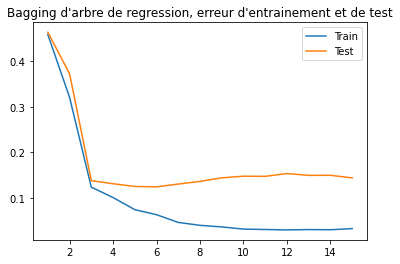

In [5]:
import warnings
warnings.filterwarnings('ignore')

**Question 5:** A quoi sert le paramètre `n_estimators` du bagging? Que se passe t'il si vous modifiez ce paramètre? Illustrez cela avec des expériences.

**Question 6:** Remplacer les arbres de régression combinés au bagging par une [random forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor). Que remarquez vous par rapport à la question 4? Est ce surprenant? Formulez une récommendation pour le choix de la profondeur maximale dans les forêts alléatoires.

Min train error: 0.023125316535445292
Min test error: 0.11785045757028881


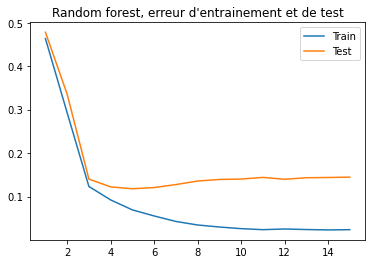

## Boosting regression trees.

On reprend la **Question 3** et les suivantes en remplaçant le bagging par du le [boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html#sklearn.ensemble.AdaBoostRegressor). Le régresseur de base reste un arbre.

**Question 7:** Représenter pour en fonction de la profondeur maximale $p = 1, \ldots, 15$ l'erreur d'entrainement et une estimation de l'erreur de prédiction en fonction de $p$. Commenter l'allure de cette courbe et comparer aux  questions précédentes. Que vaut l'erreur de prédiction minimale? Comment cela se compare t'il à la question 3 et aux suivantes? Quelle est la différence avec le bagging?

Min train error: 0.00153070045685117
Min test error: 0.11787525107080954


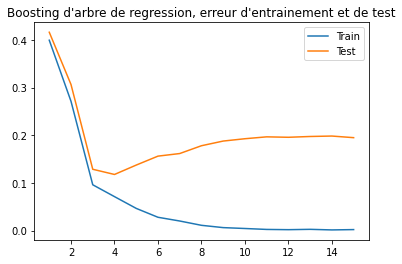

**Question 8:** A quoi sert le paramètre `n_estimators` du boosting? Que se passe t'il si vous modifiez ce paramètre? Illustrez cela avec des expériences.

## Gradient boosting with regression trees.

L'échantillon d'entrainement est fixé. On reprend la question précédent en remplaçant le boosting par du le [gradient boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html#sklearn.ensemble.GradientBoostingRegressor). Le régresseur de base reste un arbre (scikit-learn ne vous laisse pas le choix.

**Question 8:** Représenter pour en fonction de la profondeur maximale $p = 1, \ldots, 15$ l'erreur d'entrainement et une estimation de l'erreur de prédiction en fonction de $p$. Commenter l'allure de cette courbe. Que vaut l'erreur de prédiction minimale? Comparer avec ce que vous obtenez pour le bagging et le boosting?

Min train error: 9.875285569440584e-08
Min test error: 0.11629816267942003


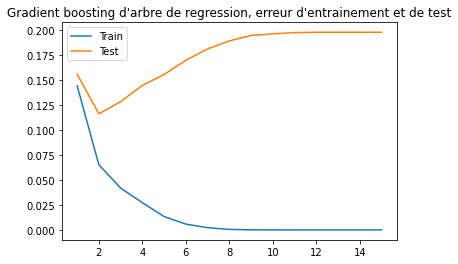

Estimer la variance par la méthode du bootstrap pour un échantillon d'entrainement fixé, comparer.

## Décomposition biais variance
Question difficile, ne la traiter qu'à la fin du TP. 

**Question 9:** que produit la commande suivante? Quel est le rôle de `1/3`? Pourquoi y a t'il un `reshape`?

In [9]:
dtr = sk.tree.DecisionTreeRegressor(max_depth = p+1)
dtr.fit(xn, yn)
dtr.predict(np.reshape(1/3,(1,-1)))

array([1.4311587])

**Question 10:** Vous savez que l'espérance conditionelle $\mathbb{E}[Y|X=x] = \sin(5x)$, pour tout $x$ et que l'erreur de Bayes est de $1/10$ (pourquoi?).  
La taille de l'échantillon d'entrainement est fixée à `n=200`, vous pouvez générer autant d'échantillon que vous voulez. Expliquer en quoi la commande suivante estime la décomposition biais variance de l'erreur de prediction de l'estimateur de régression par arbre en $x = 1/3$ pour une profondeur maximale $p = 4$. 


**Rappel:** pour un estimateur $\hat{f}_n$ dépendant d'un échantillon $\left\{(X_i, Y_i)\right\}_{i=1}^n$, le biais et la variance sont donnés respectivement par:
$$\mathbb{E}_n\left[f^*(1/3) - \hat{f}_n(1/3) \right]^2 \qquad\qquad \text{Var}_n\left[ \hat{f}_n(1/3)\right]  $$
où $f^*(1/3) = \mathbb{E}[Y|X=1/3]$ désigne la règle de Bayes et $\mathbb{E}_n$ et $\text{Var}_n$ désignent l'espérance et la variance pour le tirage de l'échantillon.

In [10]:
nTrain = 100
n=200
xPred = 1/3
predUnTiers = np.zeros(nTrain)
for i in range(nTrain):
    (xn,yn) = generateData(n,i)
    dtr = sk.tree.DecisionTreeRegressor(max_depth = 4)
    dtr.fit(xn, yn)
    predUnTiers[i] = dtr.predict(np.reshape(xPred,(1,-1)))

print("Biais: " + str(np.mean(predUnTiers- np.sin(5*xPred))**2 ) )
print("Variance: " + str(np.mean((predUnTiers - np.mean(predUnTiers))**2) ) ) 

Biais: 0.05062071370006559
Variance: 0.013254510238463937


**Question 11:** Vous savez que l'espérance conditionelle $\mathbb{E}[Y|X=x] = \sin(5x)$, pour tout $x$ et que l'erreur de Bayes est de $1/10$ (pourquoi?).  
La taille de l'échantillon d'entrainement est fixée à `n=200`, vous pouvez générer autant d'échantillon que vous voulez. Estimer et représenter la décomposition biais variance de l'erreur de prediction de l'estimateur de régression par arbre en $x = 1/3$ en fonction de la profondeur maximale $p$ variant entre 2 et 13. 

Min risque: 0.11487949441932863


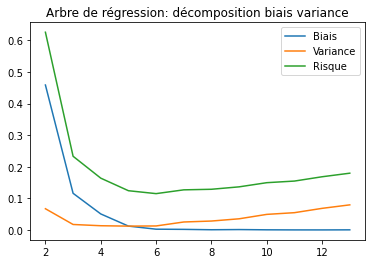

**Question 12:** Reprendre la question 9 avec le bagging puis avec le gradient boosting. Pour le gradient boosting, vous pouvez limiter la profondeur d'arbre à $p=1,\ldots, 6$. Comment pouvez vous décrire l'effet du bagging et du gradient boosting sur la variance et sur le biais. 

Min risque: 0.10983882705208499


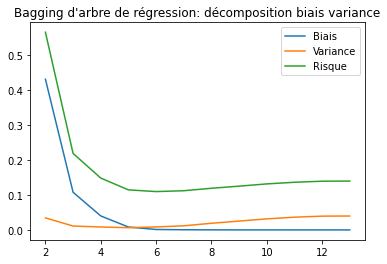

Min risque: 0.11560258855453596


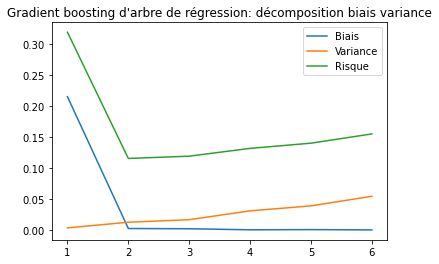

**Question 13:** Proposer une conclusion générale pour l'ensemble du TP.